### 1.1 Use methods of descriptive statistics to summarize data. 
#### Which Region and which Channel spent the most? 
#### Which Region and which Channel spent the least?

In [13]:
### 1.1.1
import numpy as np
import pandas as pd
from scipy.stats import ttest_1samp, ttest_ind
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.api as sm



#### Importing datasets

In [2]:
df1 = pd.read_csv("C:/Users/rakes/Desktop/GL/SMDM/Project/Wholesale+Customers+Data.csv")
df1.head()

df2 = pd.read_csv("C:/Users/rakes/Desktop/GL/SMDM/Project/Survey-1.csv")
df2.head()

df3 = pd.read_csv("C:/Users/rakes/Desktop/GL/SMDM/Project/A+&+B+shingles.csv")
df3.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [12]:
df1.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Channel,440,2,Hotel,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,440,3,Other,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,440.0,NaN,NaN,NaN,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,NaN,NaN,NaN,5796.265909,7380.377175,55.0,1533.0,3627.0,7190.25,73498.0
Grocery,440.0,NaN,NaN,NaN,7951.277273,9503.162829,3.0,2153.0,4755.5,10655.75,92780.0
Frozen,440.0,NaN,NaN,NaN,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,NaN,NaN,NaN,2881.493182,4767.854448,3.0,256.75,816.5,3922.0,40827.0
Delicatessen,440.0,NaN,NaN,NaN,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [383]:
df1.groupby(['Region']).sum()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Region,,,,,,
Lisbon,854833,422454,570037,231026,204136,104327
Oporto,464721,239144,433274,190132,173311,54506
Other,3960577,1888759,2495251,930492,890410,512110


In [384]:
df1.groupby(['Channel']).sum()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Channel,,,,,,
Hotel,4015717,1028614,1180717,1116979,235587,421955
Retail,1264414,1521743,2317845,234671,1032270,248988


In [402]:
df1['Total'] = df1[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']].sum(axis=1)
df1

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,Retail,Other,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...,...,...
435,Hotel,Other,29703,12051,16027,13135,182,2204,73302
436,Hotel,Other,39228,1431,764,4510,93,2346,48372
437,Retail,Other,14531,15488,30243,437,14841,1867,77407
438,Hotel,Other,10290,1981,2232,1038,168,2125,17834


In [401]:
print(df1.groupby(['Region'])['Total'].sum())
print(df1.groupby(['Channel'])['Total'].sum())

Region
Lisbon     2386813
Oporto     1555088
Other     10677599
Name: Total, dtype: int64
Channel
Hotel     7999569
Retail    6619931
Name: Total, dtype: int64


In [262]:
df1.drop(['Buyer/Spender'],axis = 1, inplace = True)
df1
df1.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,Hotel,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185


### 1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

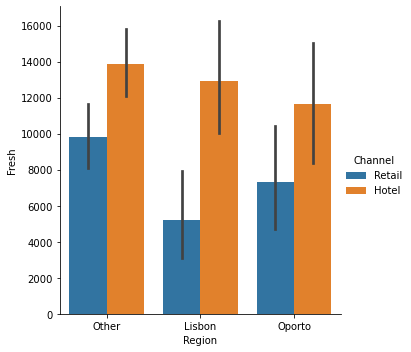

In [120]:
sns.catplot(data=df1, x='Region', y='Fresh', hue='Channel', kind='bar');

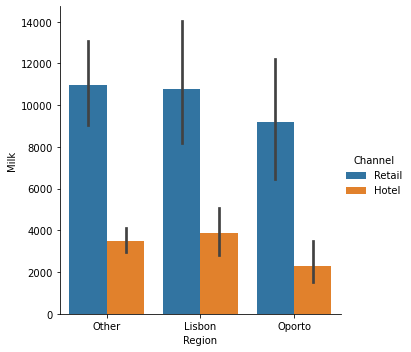

In [122]:
sns.catplot(data=df1, x='Region', y='Milk', hue='Channel', kind='bar');

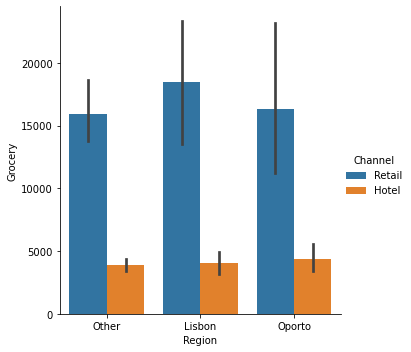

In [123]:
sns.catplot(data=df1, x='Region', y='Grocery', hue='Channel', kind='bar');

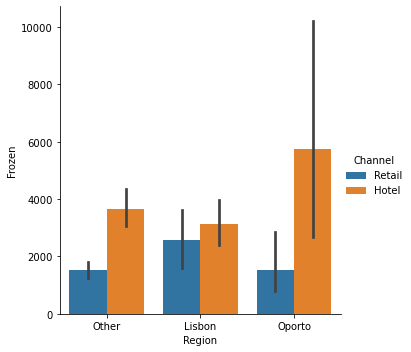

In [124]:
sns.catplot(data=df1, x='Region', y='Frozen', hue='Channel', kind='bar');

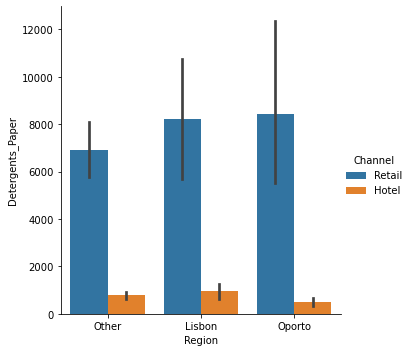

In [121]:
sns.catplot(data=df1, x='Region', y='Detergents_Paper', hue='Channel', kind='bar');

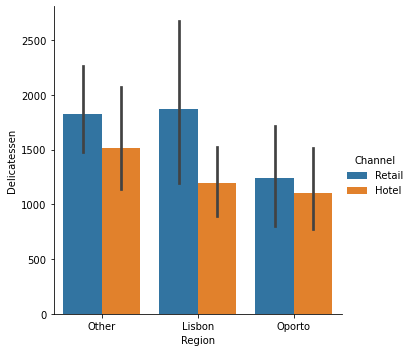

In [130]:
sns.catplot(data=df1, x='Region', y='Delicatessen', hue='Channel', kind='bar');

In [60]:
df1.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Channel,440,2,Hotel,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,440,3,Other,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,440.0,NaN,NaN,NaN,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,NaN,NaN,NaN,5796.265909,7380.377175,55.0,1533.0,3627.0,7190.25,73498.0
Grocery,440.0,NaN,NaN,NaN,7951.277273,9503.162829,3.0,2153.0,4755.5,10655.75,92780.0
Frozen,440.0,NaN,NaN,NaN,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,NaN,NaN,NaN,2881.493182,4767.854448,3.0,256.75,816.5,3922.0,40827.0
Delicatessen,440.0,NaN,NaN,NaN,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


### 1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

In [67]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [70]:
cv_fresh = df1['Fresh'].std()/df1['Fresh'].mean()
cv_fresh

1.0539179237473149

In [77]:
cv_milk = df1['Milk'].std()/df1['Milk'].mean()
cv_milk

1.2732985840065414

In [78]:
cv_grocery = df1['Grocery'].std()/df1['Grocery'].mean()
cv_grocery

1.1951743730016824

In [79]:
cv_frozen = df1['Frozen'].std()/df1['Frozen'].mean()
cv_frozen

1.5803323836352914

In [81]:
cv_Detergents_Paper = df1['Detergents_Paper'].std()/df1['Detergents_Paper'].mean()
cv_Detergents_Paper

1.6546471385005155

In [82]:
cv_Delicatessen = df1['Delicatessen'].std()/df1['Delicatessen'].mean()
cv_Delicatessen

1.8494068981158382

#### Answer: From the above result we can infer that Delicatessen items displayed the most inconsistent behaviour and Fresh items displayed the least inconsistent behaviour.  

### 1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

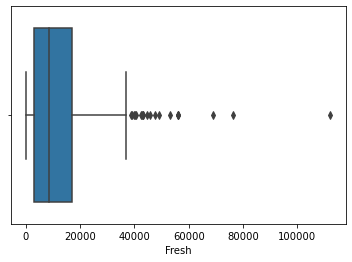

In [83]:
sns.boxplot(data=df1, x='Fresh');

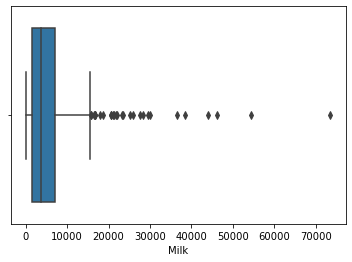

In [86]:
sns.boxplot(data=df1, x='Milk');

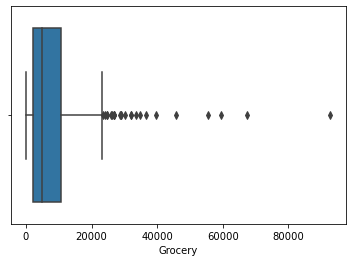

In [87]:
sns.boxplot(data=df1, x='Grocery');

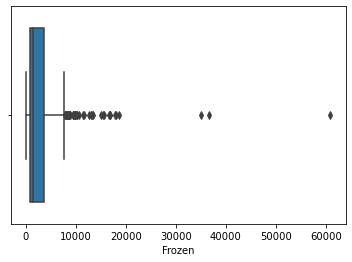

In [88]:
sns.boxplot(data=df1, x='Frozen');

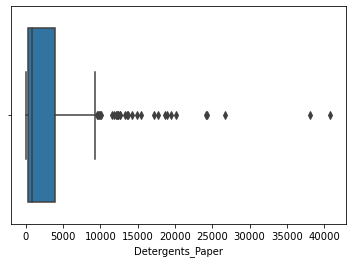

In [99]:
sns.boxplot(data=df1, x='Detergents_Paper');

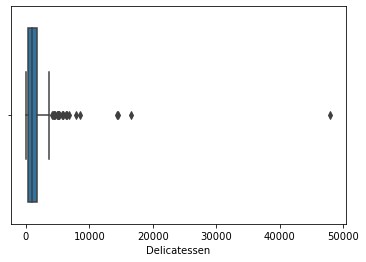

In [97]:
sns.boxplot(data=df1, x='Delicatessen');

### 1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective

# Problem 2

### 2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

#### 2.1.1. Gender and Major

#### 2.1.2. Gender and Grad Intention

#### 2.1.3. Gender and Employment

#### 2.1.4. Gender and Computer

In [127]:
df2

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,Female,21,Senior,International Business,No,2.4,Part-Time,40.0,1,3,1000,Laptop,10
58,59,Female,20,Junior,CIS,No,2.9,Part-Time,40.0,2,4,350,Laptop,250
59,60,Female,20,Sophomore,CIS,No,2.5,Part-Time,55.0,1,4,500,Laptop,500
60,61,Female,23,Senior,Accounting,Yes,3.5,Part-Time,30.0,2,3,490,Laptop,50


In [374]:
df2.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,62.0,NaN,NaN,NaN,31.5,18.041619,1.0,16.25,31.5,46.75,62.0
Gender,62,2,Female,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,62.0,NaN,NaN,NaN,21.129032,1.431311,18.0,20.0,21.0,22.0,26.0
Class,62,3,Senior,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Major,62,8,Retailing/Marketing,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Grad Intention,62,3,Yes,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GPA,62.0,NaN,NaN,NaN,3.129032,0.377388,2.3,2.9,3.15,3.4,3.9
Employment,62,3,Part-Time,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,62.0,NaN,NaN,NaN,48.548387,12.080912,25.0,40.0,50.0,55.0,80.0
Social Networking,62.0,NaN,NaN,NaN,1.516129,0.844305,0.0,1.0,1.0,2.0,4.0


In [129]:
# Gender and Major Contingency Table
pd.crosstab(df2['Gender'],df2['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [130]:
# Gender and Grad Intention Contingency Table
pd.crosstab(df2['Gender'],df2['Grad Intention'])

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [131]:
# Gender and Employment Contingency Table
pd.crosstab(df2['Gender'],df2['Employment'])

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [132]:
# Gender and Computer Contingency Table
pd.crosstab(df2['Gender'],df2['Computer'])

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


### 2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

#### 2.2.1. What is the probability that a randomly selected CMSU student will be male?

#### 2.2.2. What is the probability that a randomly selected CMSU student will be female?

In [154]:
a = df2['Gender'].value_counts()
Total_number_of_students = len(df2['Gender'])
Total_number_of_students = 62


print("The probability that a randomly selected CMSU student will be male:" , 29/62)
print("The probability that a randomly selected CMSU student will be female:" , 33/62)

The probability that a randomly selected CMSU student will be male: 0.46774193548387094
The probability that a randomly selected CMSU student will be female: 0.532258064516129


### 2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

### 2.3.1. Find the conditional probability of different majors among the male students in CMSU.

### 2.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [146]:
pd.crosstab(df2['Gender'],df2['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [381]:
print("Probability of Accounting among male students:",4/29)
print("Probability of CIS among male students:",1/29)
print("Probability of Economics/Finance among male students:",4/29)
print("Probability of International Business among male students:",2/29)
print("Probability of Management among male students:",6/29)
print("Probability of Other Major among male students:",4/29)
print("Probability of Retailing/Marketing among male students:",5/29)
print("Probability of Undecided among male students:",3/29)

Probability of Accounting among male students: 0.13793103448275862
Probability of CIS among male students: 0.034482758620689655
Probability of Economics/Finance among male students: 0.13793103448275862
Probability of International Business among male students: 0.06896551724137931
Probability of Management among male students: 0.20689655172413793
Probability of Other Major among male students: 0.13793103448275862
Probability of Retailing/Marketing among male students: 0.1724137931034483
Probability of Undecided among male students: 0.10344827586206896


In [382]:
print("Probability of Accounting among female students:",3/33)
print("Probability of CIS among female students:",3/33)
print("Probability of Economics/Finance among female students:",7/33)
print("Probability of International Business among female students:",4/33)
print("Probability of Management among female students:",4/33)
print("Probability of Other Major among female students:",3/33)
print("Probability of Retailing/Marketing among female students:",9/33)
print("Probability of Undecided among female students:",0/33)

Probability of Accounting among female students: 0.09090909090909091
Probability of CIS among female students: 0.09090909090909091
Probability of Economics/Finance among female students: 0.21212121212121213
Probability of International Business among female students: 0.12121212121212122
Probability of Management among female students: 0.12121212121212122
Probability of Other Major among female students: 0.09090909090909091
Probability of Retailing/Marketing among female students: 0.2727272727272727
Probability of Undecided among female students: 0.0


### 2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

### 2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

### 2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop. ### 

In [172]:
pd.crosstab(df2['Gender'],df2['Grad Intention'])

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [346]:
print("The probability that a randomly chosen student is a male and intends to graduate : Graduate ∩ Male) =",(17/29))

The probability that a randomly chosen student is a male and intends to graduate : Graduate ∩ Male) = 0.5862068965517241


In [175]:
pd.crosstab(df2['Gender'],df2['Computer'])

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


In [348]:
print("The probability that a randomly chosen student is a female and does not have a laptop : 1 - P(Have Laptop | Female)= ",1 - (29/33))

The probability that a randomly chosen student is a female and does not have a laptop : 1 - P(Have Laptop | Female)=  0.12121212121212122


### 2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

### 2.5.1. Find the probability that a randomly chosen student is a male or has full-time employment?

### 2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.



In [180]:
pd.crosstab(df2['Gender'], df2['Employment'])

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [191]:
# The probability that a randomly chosen student is a male or has full-time employment
print("The probability that a randomly chosen student is a male :",29/62 )
print("The probability that a randomly chosen student has full-time employment :",10/62 )
print("The probability that a randomly chosen student is a male or has full-time employment = P(AUB) = P(A) + P(B) - P(A ∩ B):",39/62 - 7/62)


The probability that a randomly chosen student is a male : 0.46774193548387094
The probability that a randomly chosen student has full-time employment : 0.16129032258064516
The probability that a randomly chosen student is a male or has full-time employment = P(AUB) = P(A) + P(B) - P(A ∩ B): 0.5161290322580645


In [340]:
pd.crosstab(df2['Gender'], df2['Major'])


Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [204]:
print("The conditional probability that given a female student is randomly chosen:",33/62)
print("The conditional probability that she is majoring in international business:",4/33)
print("The conditional probability that she is majoring in management:",4/33)
print("The conditional probability that the female student is majoring in international business or management:P(A|B) = P(A∩B) / P(B):",
      (8/33)/(33/62))

The conditional probability that given a female student is randomly chosen: 0.532258064516129
The conditional probability that she is majoring in international business: 0.12121212121212122
The conditional probability that she is majoring in management: 0.12121212121212122
The conditional probability that the female student is majoring in international business or management:P(A|B) = P(A∩B) / P(B): 0.45546372819100095


### 2.6.  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?



In [356]:
df2[df2['Grad Intention'] == 'Undecided'].index
df2_und = df2.drop(df2[df2['Grad Intention'] == 'Undecided'].index)
df2_und['Grad Intention'].unique()

array(['Yes', 'No'], dtype=object)

In [358]:
pd.crosstab(df2_und['Gender'],df2_und["Grad Intention"])

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


In [364]:
print("Independent events check:P(Female ∩ GradYes) = P(Female)*P(GradYes)")
print("P(Female):",20/40)
print("P(GradYes):",28/40)
print("P(Female)*P(GradYes):",0.5*0.7)
print("P(Female ∩ GradYes):",11/40)
print("Therefore, we can conclude that graduate intention and being female are not independent events.")

Independent events check:P(Female ∩ GradYes) = P(Female)*P(GradYes)
P(Female): 0.5
P(GradYes): 0.7
P(Female)*P(GradYes): 0.35
P(Female ∩ GradYes): 0.275
Therefore, we can conclude that graduate intention and being female are not independent events.


### 2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.

#### Answer the following questions based on the data

### 2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

### 2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.



In [221]:
pd.crosstab(df2['Gender'],df2['GPA'])

GPA,2.3,2.4,2.5,2.6,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9
Gender,,,,,,,,,,,,,,,,
Female,1,1,2,0,1,3,5,2,4,3,2,4,1,2,1,1
Male,0,0,4,2,2,1,2,5,2,2,5,2,2,0,0,0


In [222]:
pd.crosstab(df2['Gender'],df2['GPA']<3)

GPA,False,True
Gender,,
Female,25,8
Male,20,9


In [226]:
print("If a student is chosen randomly, the probability that his/her GPA is less than 3:",17/62)

If a student is chosen randomly, the probability that his/her GPA is less than 3: 0.27419354838709675


In [259]:
pd.crosstab(df2['Gender'],df2['Salary']>=50)

Salary,False,True
Gender,,
Female,15,18
Male,15,14


In [260]:
print("The conditional probability that a randomly selected male earns 50 or more:P(A|B) = P(A∩B) / P(B) =",(14/62)/(29/62))
print("The conditional probability that a randomly selected female earns 50 or more:P(A|B) = P(A∩B) / P(B) =",(18/62)/(33/62))

The conditional probability that a randomly selected male earns 50 or more:P(A|B) = P(A∩B) / P(B) = 0.4827586206896552
The conditional probability that a randomly selected female earns 50 or more:P(A|B) = P(A∩B) / P(B) = 0.5454545454545455


### 2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.

In [308]:
df2.describe()


,ID,Age,GPA,Salary,Social Networking,Satisfaction,Spending,Text Messages
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,31.500000,21.129032,3.129032,48.548387,1.516129,3.741935,482.016129,246.209677
std,18.041619,1.431311,0.377388,12.080912,0.844305,1.213793,221.953805,214.465950
min,1.000000,18.000000,2.300000,25.000000,0.000000,1.000000,100.000000,0.000000
25%,16.250000,20.000000,2.900000,40.000000,1.000000,3.000000,312.500000,100.000000
50%,31.500000,21.000000,3.150000,50.000000,1.000000,4.000000,500.000000,200.000000
75%,46.750000,22.000000,3.400000,55.000000,2.000000,4.000000,600.000000,300.000000
max,62.000000,26.000000,3.900000,80.000000,4.000000,6.000000,1400.000000,900.000000


C:\Users\rakes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GPA', ylabel='Density'>

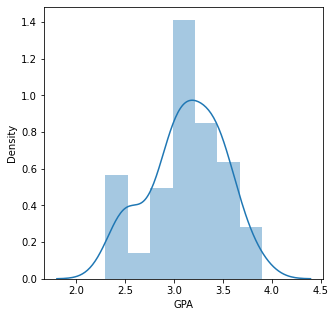

In [332]:
plt.figure(figsize=(5,5))

# df2['GPA'].plot(kind = 'hist')

sns.distplot(df2['GPA'])


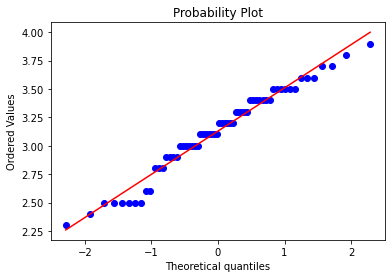

In [366]:
stats.probplot(df2['GPA'], plot=plt);

C:\Users\rakes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

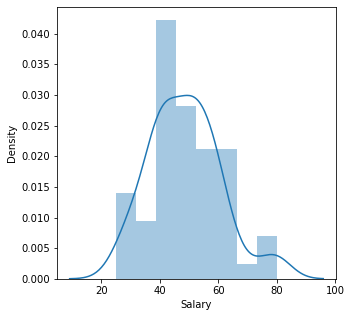

In [333]:
plt.figure(figsize=(5,5))

sns.distplot(df2['Salary'])


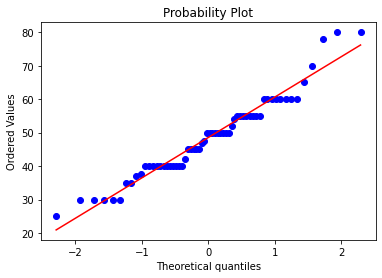

In [368]:
stats.probplot(df2['Salary'], plot=plt);

C:\Users\rakes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Text Messages', ylabel='Density'>

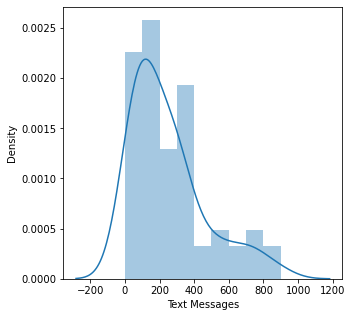

In [334]:
plt.figure(figsize=(5,5))

sns.distplot(df2['Text Messages'])


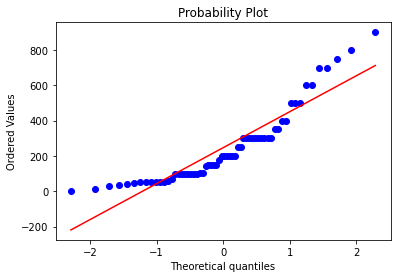

In [372]:
stats.probplot(df2['Text Messages'], plot=plt);


C:\Users\rakes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Spending', ylabel='Density'>

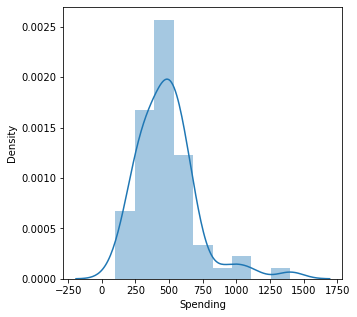

In [335]:
plt.figure(figsize=(5,5))
sns.distplot(df2['Spending'])


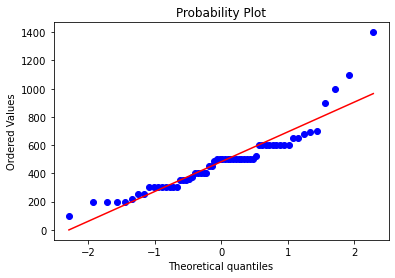

In [417]:
stats.probplot(df2['Spending'], plot=plt,);


# Problem 3



### 3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.



In [414]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
A,36.0,0.316667,0.135731,0.13,0.2075,0.29,0.3925,0.72
B,31.0,0.273548,0.137296,0.10,0.1600,0.23,0.4000,0.58


In [413]:
# H0 : Mean moisture >= 0.35
# H1 : Mean moisture < 0.35

# Sample A
t_statistic, p_value = ttest_1samp(df3['A'],0.35, nan_policy='omit')
print("tStatistic = ", t_statistic)
print("pvalue = ", p_value/2)

tStatistic =  -1.4735046253382782
pvalue =  0.07477633144907513


In [415]:
# H0 : Mean moisture >= 0.35
# H1 : Mean moisture < 0.35

# Sample B
t_statistic, p_value = ttest_1samp(df3['B'],0.35, nan_policy='omit')
print("tStatistic = ", t_statistic)
print("pvalue = ", p_value/2)

tStatistic =  -3.1003313069986995
pvalue =  0.0020904774003191826


### 3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

In [416]:
t_statistic, p_value  = ttest_ind(df3['A'],df3['B'],nan_policy='omit')
print('t_statistic =',t_statistic)    
print('P Value = ',p_value)

t_statistic = 1.2896282719661123
P Value =  0.2017496571835306
